<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial_Intelligence_Course_Full/blob/main/wk9_AI_310323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
###################Artificial Neural Network###################

In [112]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [113]:
#Tuân thủ quy định Keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [114]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [115]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [116]:
X = test_images
y = test_labels

In [117]:
digit = train_images[200]


So nay la: 1


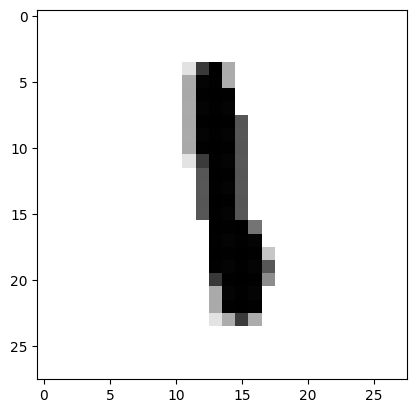

In [118]:
plt.imshow(digit, cmap = plt.cm.binary)
print("So nay la:", train_labels[200])

So nay la: 3


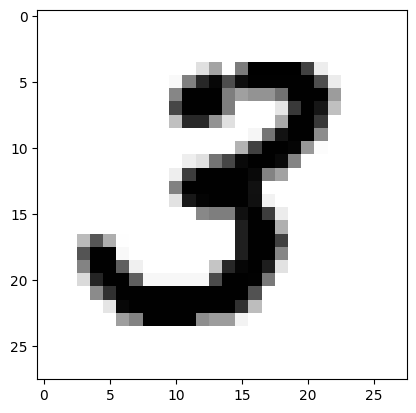

In [119]:
digit = train_images[255]
plt.imshow(digit, cmap = plt.cm.binary)
print("So nay la:", train_labels[255])

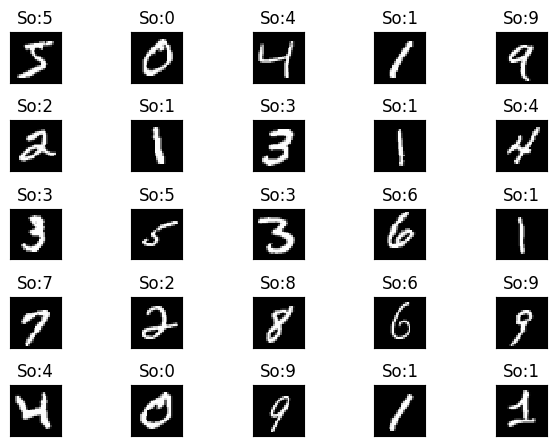

In [120]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap ="gray", interpolation ="none")
  plt.title("So:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [121]:
from keras.models import Sequential #ANN
from keras.layers import Dense

In [122]:
model = Sequential()
model.add(Dense(512, activation = "relu", input_shape = (784,))) #tao 512 te bao, input 784

In [123]:
model.add(Dense(10, activation = "softmax")) #input_shape = 512

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [125]:
train_images = train_images.reshape(60000, 28*28)  #60000 anh trong tap train_images

In [126]:
train_images = train_images.astype("float32")/255

In [127]:
test_images = test_images.reshape(10000, 28*28)  #10000 anh trong tap test_images

In [128]:
test_images = test_images.astype("float32")/255

In [129]:
from keras.utils import to_categorical

In [130]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [131]:
train_labels.shape

(60000, 10)

In [132]:
test_labels.shape

(10000, 10)

In [133]:
#data - model - cpmpile - train - evaluate

In [134]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [135]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2604 - accuracy: 0.9258
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1072 - accuracy: 0.9683
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0703 - accuracy: 0.9795
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0386 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0293 - accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0224 - accuracy: 0.9933
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0165 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0126 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0095 - accuracy

In [136]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Mat mat:", test_loss)
print("Do chinh xac:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0629 - accuracy: 0.9821
Mat mat: 0.06286066025495529
Do chinh xac: 0.9821000099182129


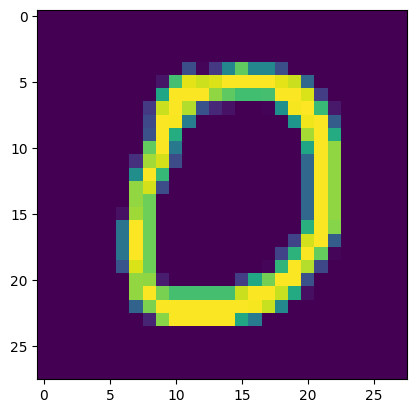

0


In [137]:
img = X[10]
plt.imshow(img)
plt.show()
print(y[10])

In [138]:
X_pred = X[10].reshape(1, 28*28)

In [139]:
X_pred.shape

(1, 784)

In [140]:
X_pred = X_pred.astype("float32")/255 #Dua ve gia tri 0-1

In [141]:
import numpy as np

In [142]:
np.argmax(model.predict(X_pred), axis = -1)

1/1 [==============================] - 0s 78ms/step


array([0])

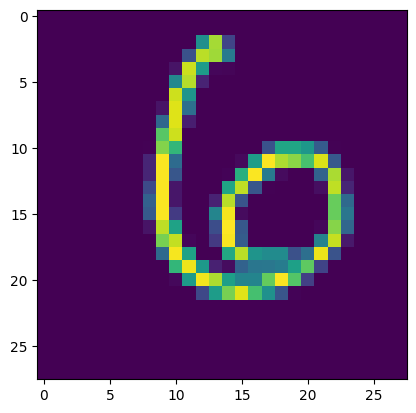

6


In [143]:
img = X[100]
plt.imshow(img)
plt.show()
print(y[100])

In [144]:
X_pred = X[100].reshape(1, 28*28)

In [145]:
X_pred = X_pred.astype("float32")/255 #Dua ve gia tri 0-1

In [146]:
import numpy as np
np.argmax(model.predict(X_pred), axis = -1)

1/1 [==============================] - 0s 40ms/step


array([6])

In [147]:
#############################################cifar10#############################################

In [ ]:
import keras
from keras.datasets import cifar10
keras.datasets.cifar10.load_data()

In [149]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [150]:
X = test_images
y = test_labels

In [151]:
digit = train_images[200]

Vat: [6]


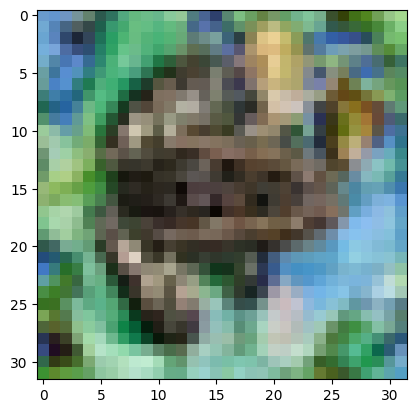

In [152]:
plt.imshow(digit, cmap = plt.cm.binary)
print("Vat:", train_labels[200])

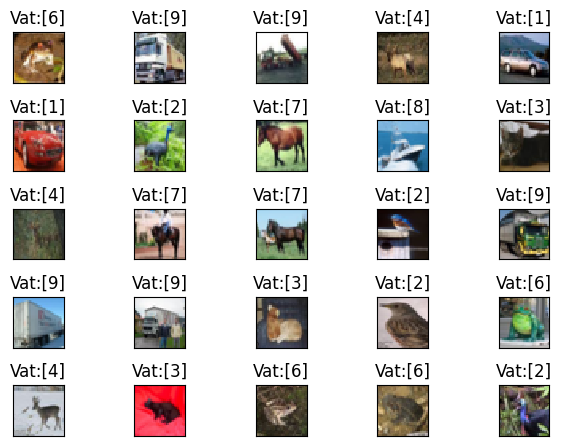

In [153]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap ="gray", interpolation ="none")
  plt.title("Vat:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [154]:
model = Sequential()
model.add(Dense(1000, activation = "relu", input_shape = (3072,)))

In [155]:
model.add(Dense(10, activation = "softmax")) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


In [156]:
train_images.shape

(50000, 32, 32, 3)

In [157]:
train_images = train_images.reshape(50000, 32*32*3)

In [158]:
train_images = train_images.astype("float32")/255

In [159]:
test_images.shape

(10000, 32, 32, 3)

In [160]:
test_images = test_images.reshape(10000, 32*32*3)

In [161]:
test_images = test_images.astype("float32")/255

In [162]:
train_labels = to_categorical(train_labels, 10)

In [163]:
test_labels = to_categorical(test_labels, 10)

In [164]:
train_labels.shape

(50000, 10)

In [165]:
test_labels.shape

(10000, 10)

In [166]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [167]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
391/391 [==============================] - 25s 62ms/step - loss: 2.3853 - accuracy: 0.2629
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 1.7935 - accuracy: 0.3566
Epoch 3/10
391/391 [==============================] - 24s 61ms/step - loss: 1.7082 - accuracy: 0.3914
Epoch 4/10
391/391 [==============================] - 24s 61ms/step - loss: 1.6549 - accuracy: 0.4136
Epoch 5/10
391/391 [==============================] - 24s 61ms/step - loss: 1.6145 - accuracy: 0.4298
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 1.5794 - accuracy: 0.4426
Epoch 7/10
391/391 [==============================] - 23s 59ms/step - loss: 1.5450 - accuracy: 0.4577
Epoch 8/10
391/391 [==============================] - 23s 58ms/step - loss: 1.5217 - accuracy: 0.4616
Epoch 9/10
391/391 [==============================] - 24s 60ms/step - loss: 1.4988 - accuracy: 0.4696
Epoch 10/10
391/391 [==============================] - 25s 63ms/step - loss: 1.477

In [168]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Mat mat:", test_loss)
print("Do chinh xac:", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 1.5691 - accuracy: 0.4488
Mat mat: 1.5691231489181519
Do chinh xac: 0.4487999975681305


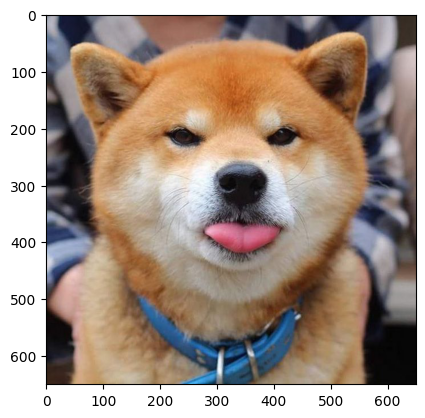

In [169]:
img = plt.imread("dog.jpg")
plt.imshow(img)
plt.show()

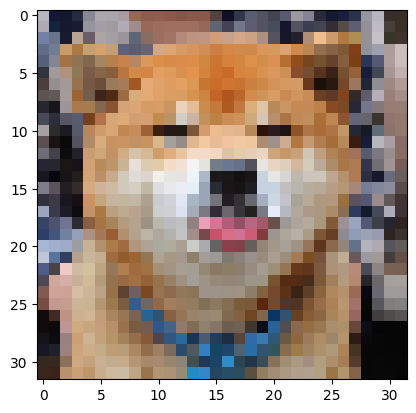

In [170]:
from keras.utils import load_img, img_to_array
img = load_img("dog.jpg", target_size=(32,32))
plt.imshow(img)

In [171]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 54ms/step


array([5])

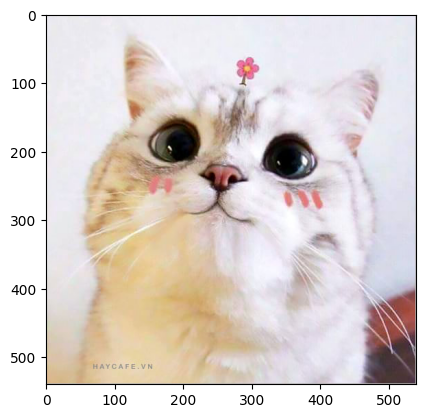

In [172]:
img = plt.imread("meo.jpg")
plt.imshow(img)
plt.show()

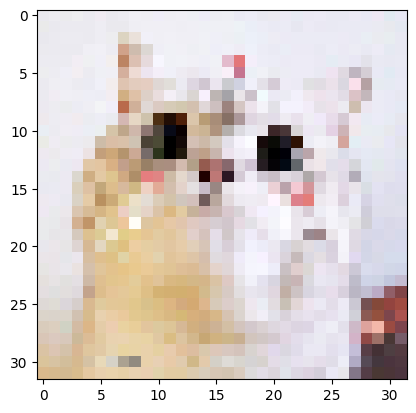

In [173]:
from keras.utils import load_img, img_to_array
img = load_img("meo.jpg", target_size=(32,32))
plt.imshow(img)

In [174]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 23ms/step


array([3])

In [175]:
#############################################cifar100#############################################

In [176]:
import keras
from keras.datasets import cifar100

In [177]:
keras.datasets.cifar100.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [178]:
X = test_images
y = test_labels

In [179]:
train_images.shape

(50000, 32, 32, 3)

In [180]:
test_images.shape

(10000, 32, 32, 3)

In [181]:
digit = train_images[200]

Vat: [39]


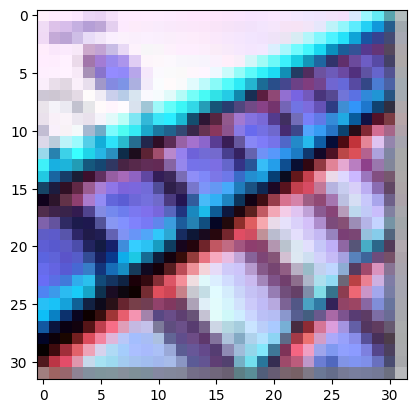

In [182]:
plt.imshow(digit, cmap = plt.cm.binary)
print("Vat:", train_labels[200])

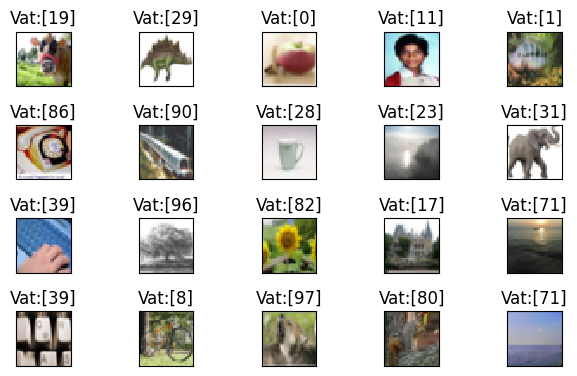

In [183]:
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap ="gray", interpolation ="none")
  plt.title("Vat:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [184]:
model = Sequential()
model.add(Dense(1600, activation = "relu", input_shape = (3072,)))
model.add(Dense(100, activation = "softmax")) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1600)              4916800   
                                                                 
 dense_11 (Dense)            (None, 100)               160100    
                                                                 
Total params: 5,076,900
Trainable params: 5,076,900
Non-trainable params: 0
_________________________________________________________________


In [185]:
train_images = train_images.reshape(50000, 32*32*3)

In [186]:
train_images = train_images.astype("float32")/255

In [187]:
test_images = test_images.reshape(10000, 32*32*3)

In [188]:
test_images = test_images.astype("float32")/255

In [189]:
train_labels = to_categorical(train_labels, 100)

In [190]:
test_labels = to_categorical(test_labels, 100)

In [191]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [192]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
391/391 [==============================] - 35s 89ms/step - loss: 4.4033 - accuracy: 0.0734
Epoch 2/10
391/391 [==============================] - 36s 91ms/step - loss: 3.7589 - accuracy: 0.1334
Epoch 3/10
391/391 [==============================] - 36s 92ms/step - loss: 3.6130 - accuracy: 0.1590
Epoch 4/10
391/391 [==============================] - 37s 95ms/step - loss: 3.5060 - accuracy: 0.1767
Epoch 5/10
391/391 [==============================] - 35s 88ms/step - loss: 3.4299 - accuracy: 0.1922
Epoch 6/10
391/391 [==============================] - 36s 92ms/step - loss: 3.3700 - accuracy: 0.2030
Epoch 7/10
391/391 [==============================] - 36s 92ms/step - loss: 3.3213 - accuracy: 0.2112
Epoch 8/10
391/391 [==============================] - 36s 92ms/step - loss: 3.2762 - accuracy: 0.2205
Epoch 9/10
391/391 [==============================] - 35s 89ms/step - loss: 3.2400 - accuracy: 0.2294
Epoch 10/10
391/391 [==============================] - 45s 114ms/step - loss: 3.20

In [193]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Mat mat:", test_loss)
print("Do chinh xac:", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 3.5123 - accuracy: 0.1958
Mat mat: 3.5123026371002197
Do chinh xac: 0.19580000638961792


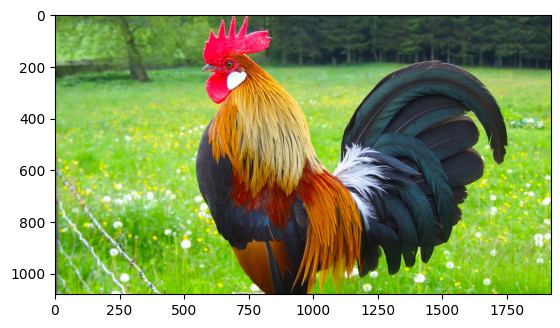

In [194]:
img = plt.imread("ga.jpg")
plt.imshow(img)
plt.show()

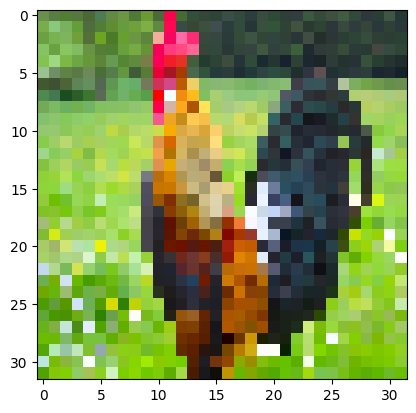

In [197]:
from keras.utils import load_img, img_to_array
img = load_img("ga.jpg", target_size=(32,32))
plt.imshow(img)

In [198]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)

1/1 [==============================] - 0s 54ms/step


array([14])

In [200]:
#############################################fashion_mnist#############################################

4422102/4422102 [==============================] - 0s 0us/step


In [201]:
import keras
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [202]:
X = test_images
y = test_labels

In [203]:
digit = train_images[1800]

Clothing: 0


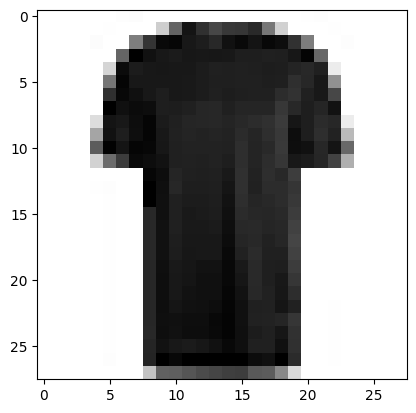

In [205]:
plt.imshow(digit, cmap = plt.cm.binary)
print("Clothing:", train_labels[1800])

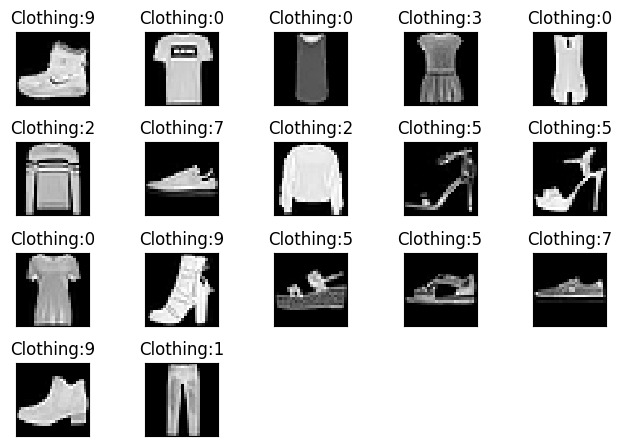

In [210]:
for i in range(17):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap ="gray", interpolation ="none")
  plt.title("Clothing:{}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [211]:
model = Sequential()
model.add(Dense(100, activation = "relu", input_shape = (784,)))

In [213]:
model.add(Dense(10, activation = "softmax")) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 79,620
Trainable params: 79,620
Non-trainable params: 0
_________________________________________________________________


In [214]:
train_images.shape

(60000, 28, 28)

In [216]:
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype("float32")/255

In [217]:
test_images.shape

(10000, 28, 28)

In [218]:
test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype("float32")/255

In [219]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [220]:
train_labels.shape
test_labels.shape

(10000, 10)

In [221]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [222]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 1.8429 - accuracy: 0.3237
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 1.5103 - accuracy: 0.3763
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3289 - accuracy: 0.3842
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 1.2345 - accuracy: 0.3924
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 1.1820 - accuracy: 0.3963
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 1.1520 - accuracy: 0.4029
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1280 - accuracy: 0.4197
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 1.1002 - accuracy: 0.4682
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0674 - accuracy: 0.5144
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0273 - accuracy: 0.5689

In [223]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Mat mat:", test_loss)
print("Do chinh xac:", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.0367 - accuracy: 0.5921
Mat mat: 1.0366804599761963
Do chinh xac: 0.5921000242233276


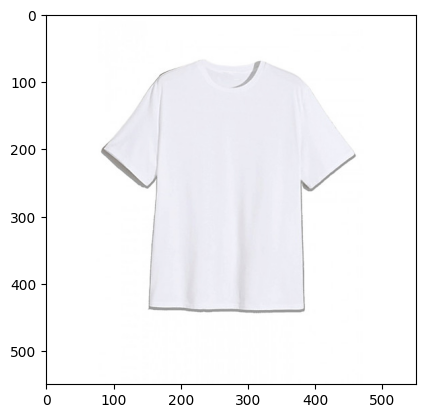

In [239]:
img = plt.imread("ao.jpg")
plt.imshow(img)
plt.show()

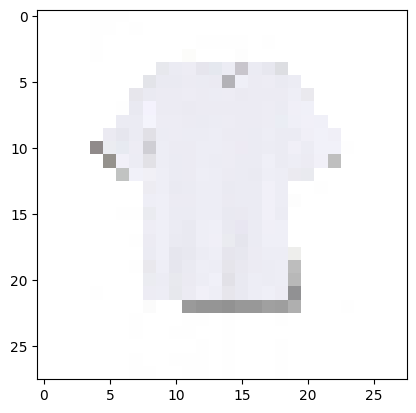

In [240]:
from keras.utils import load_img, img_to_array
img = load_img("ao.jpg", target_size=(28,28))
plt.imshow(img)